In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 80.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 78.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.2/185.2 kB 14.0

# 1. Importing Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Importing Dataset

In [3]:
df = pd.read_csv("/kaggle/input/credit-score-classification-dataset/Credit Score Classification Dataset.csv")

# 3. Data Cleaning

In [4]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [5]:
df.columns

Index(['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Credit Score'],
      dtype='object')

In [6]:
missing_values_count = df.isna().sum(axis=0)
missing_values_count


Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

So we see that there are no missing values in the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [8]:
df.shape

(164, 8)

The dataset is already clean. Doesn't require further cleaning.

# 4. EDA

In [9]:
df.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.975610,83765.243902,0.652439
std,8.477289,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,30.750000,57500.000000,0.000000
50%,37.000000,83750.000000,0.000000
75%,45.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


/tmp/ipykernel_20/985099981.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


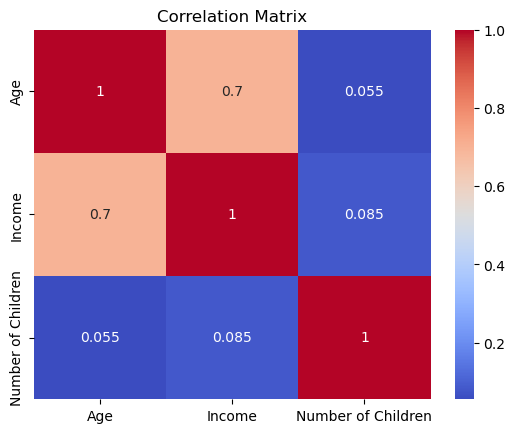

In [10]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Add title and display the plot
plt.title('Correlation Matrix')
plt.show()

We see a high positive correlation between Age and Income

## 4.1 Age

In [11]:
df.columns

Index(['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Credit Score'],
      dtype='object')

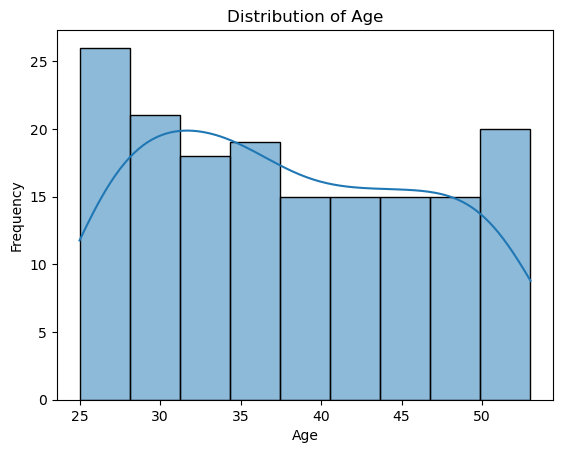

In [12]:
# Plot histogram with KDE
sns.histplot(data=df, x='Age', kde=True)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

# Display the plot
plt.show()

Distribution of the age column

## 4.2 Gender

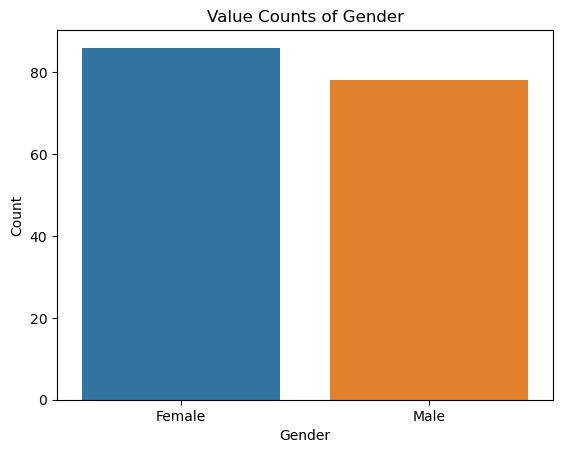

In [13]:
# Compute value counts for the "Gender" column
gender_counts = df['Gender'].value_counts()

# Plot the value counts as a bar plot
sns.barplot(x=gender_counts.index, y=gender_counts.values)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Value Counts of Gender')

# Display the plot
plt.show()

## 4.3 Income

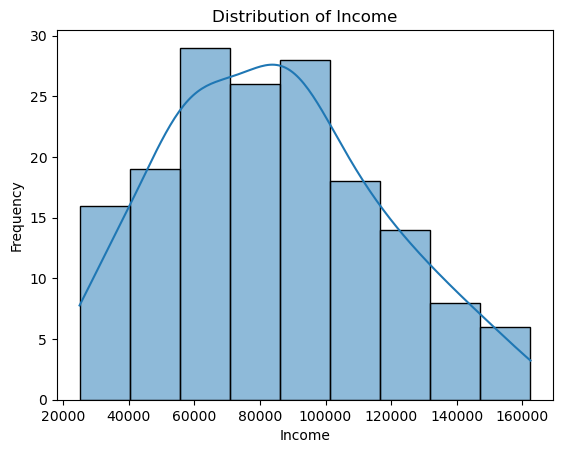

In [14]:
# Plot histogram with KDE
sns.histplot(data=df, x='Income', kde=True)

# Add labels and title
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Income')

# Display the plot
plt.show()

## 4.4 Education

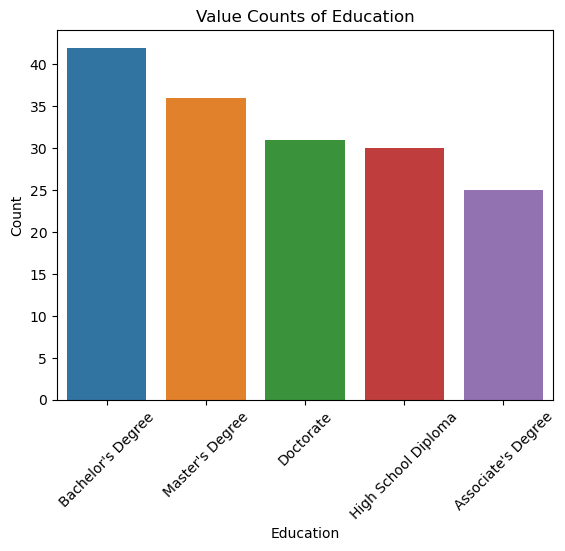

In [15]:
# Compute value counts for the "Education" column
education_counts = df['Education'].value_counts()

# Plot the value counts as a bar plot
sns.barplot(x=education_counts.index, y=education_counts.values)

# Add labels and title
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Value Counts of Education')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

## 4.5 Marital Status

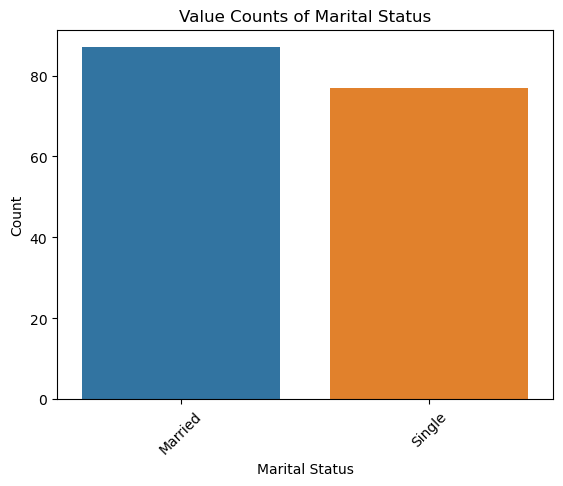

In [16]:
# Compute value counts for the "Marital Status" column
marital_status_counts = df['Marital Status'].value_counts()

# Plot the value counts as a bar plot
sns.barplot(x=marital_status_counts.index, y=marital_status_counts.values)

# Add labels and title
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Value Counts of Marital Status')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

## 4.6 Number of Children

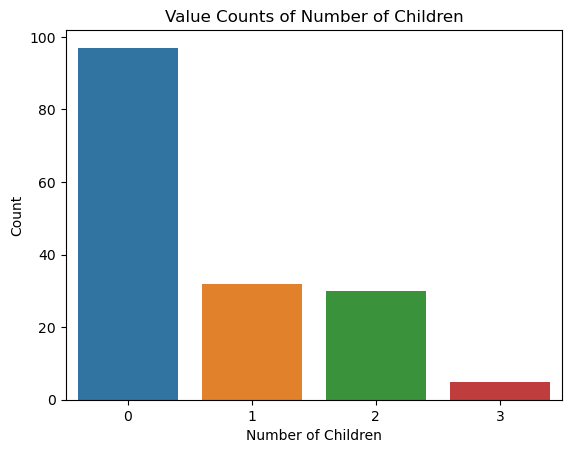

In [17]:
# Compute value counts for the "Number of Children" column
children_counts = df['Number of Children'].value_counts()

# Plot the value counts as a bar plot
sns.barplot(x=children_counts.index, y=children_counts.values)

# Add labels and title
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.title('Value Counts of Number of Children')

# Display the plot
plt.show()

## 4.7 Home Ownership

In [18]:
df.columns

Index(['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Credit Score'],
      dtype='object')

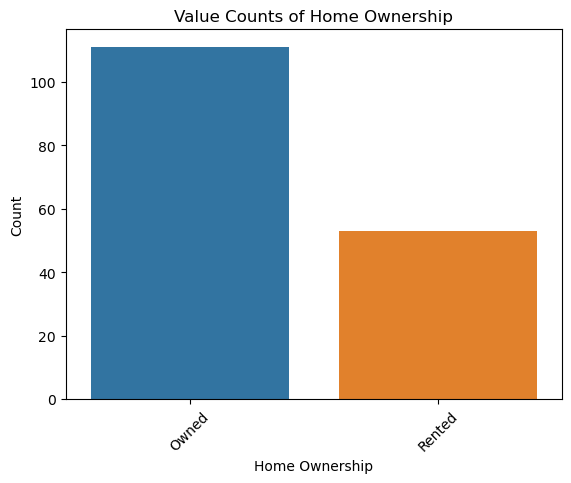

In [19]:
# Compute value counts for the "Home Ownership" column
home_ownership_counts = df['Home Ownership'].value_counts()

# Plot the value counts as a bar plot
sns.barplot(x=home_ownership_counts.index, y=home_ownership_counts.values)

# Add labels and title
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Value Counts of Home Ownership')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

## 4.8 Credit Score

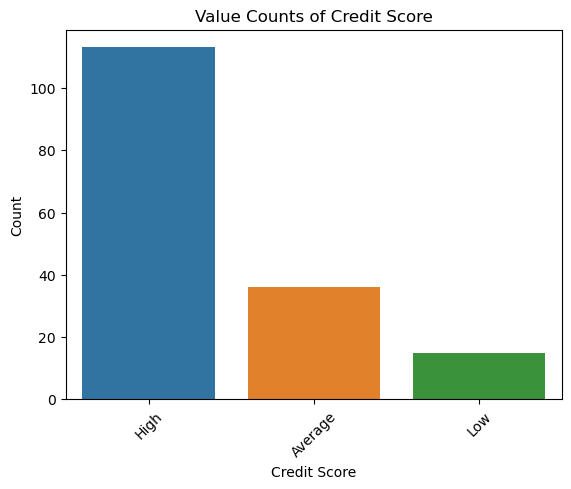

In [20]:
# Compute value counts for the "Credit Score" column
credit_score_counts = df['Credit Score'].value_counts()

# Plot the value counts as a bar plot
sns.barplot(x=credit_score_counts.index, y=credit_score_counts.values)

# Add labels and title
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.title('Value Counts of Credit Score')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

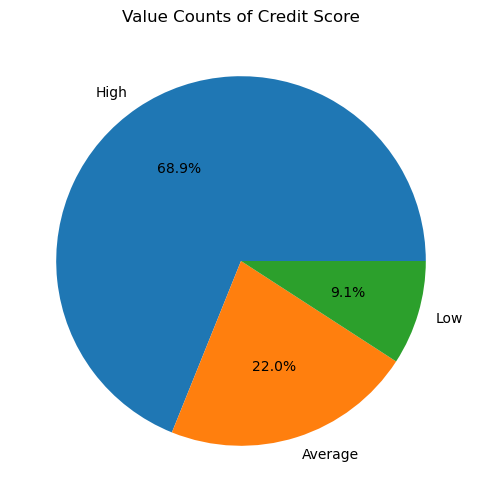

In [21]:
# Plot the value counts as a pie chart
plt.figure(figsize=(8, 6))
plt.pie(credit_score_counts.values, labels=credit_score_counts.index, autopct='%1.1f%%')
plt.title('Value Counts of Credit Score')

# Display the pie chart
plt.show()

## 4.9 Correlation w.r.t Credit Score

In [22]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame
df_encoded = df.copy()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column
for column in df_encoded.columns:
    # Check if the column needs to be encoded
    if df_encoded[column].dtype == 'object':
        # Use LabelEncoder to encode the column
        df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# Calculate the correlation with respect to 'Credit Score'
correlation = df_encoded.corr()['Credit Score']

# Print the correlation values
print(correlation)

Age                   0.205362
Gender               -0.247729
Income                0.083698
Education             0.334424
Marital Status       -0.205756
Number of Children    0.136517
Home Ownership       -0.293384
Credit Score          1.000000
Name: Credit Score, dtype: float64


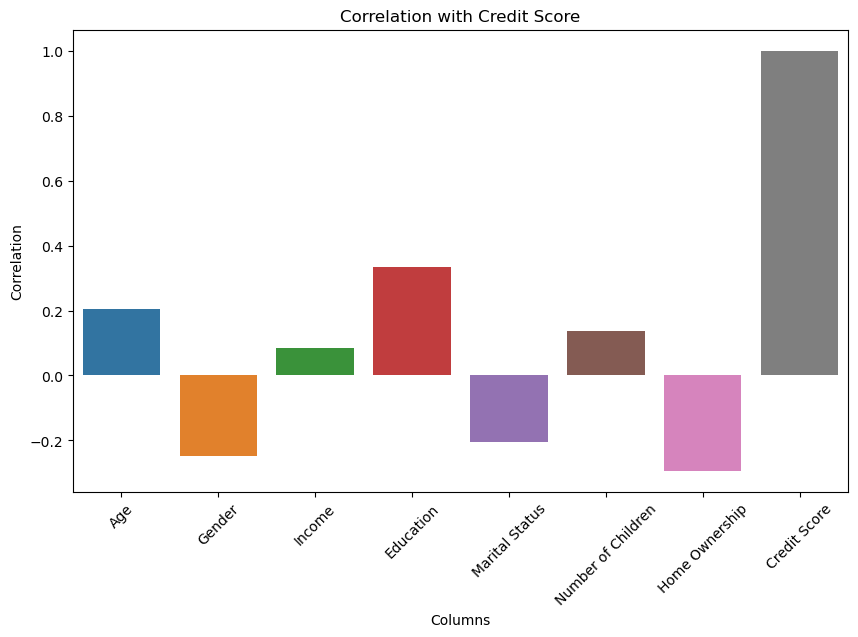

In [23]:
# Plot the correlation values as a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.index, y=correlation.values)
plt.xlabel('Columns')
plt.ylabel('Correlation')
plt.title('Correlation with Credit Score')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

A slightly +ve correlation is seen between Education and Credit Score

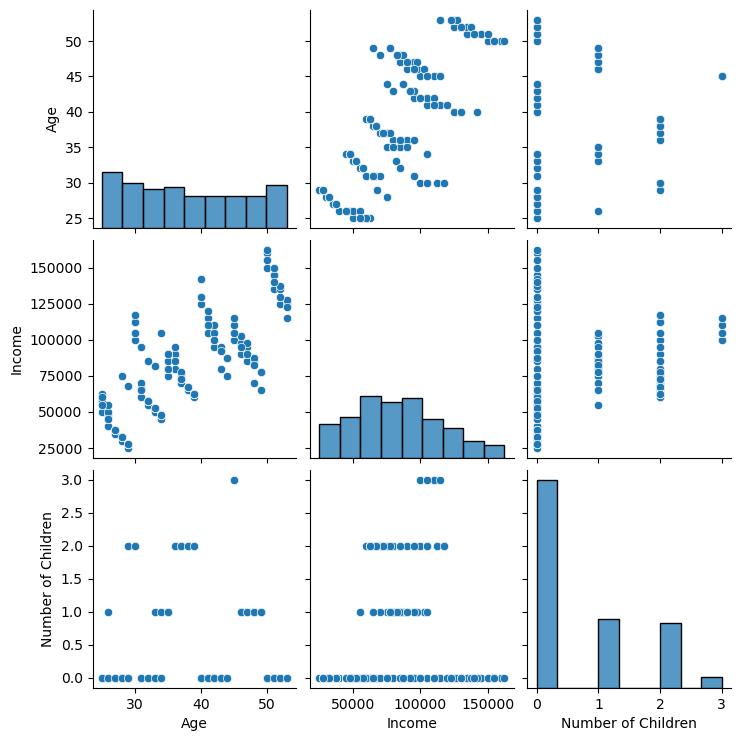

In [24]:
# Plot pairwise relationships using a pair plot
sns.pairplot(data=df)

# Display the plot
plt.show()

# 5. ML: Multiclassification (Model Comparison)

In [25]:
df_encoded.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,0,50000,1,1,0,1,1
1,30,1,100000,4,0,2,0,1
2,35,0,75000,2,0,1,0,1
3,40,1,125000,3,1,0,0,1
4,45,0,100000,1,0,3,0,1


In [26]:
from sklearn.model_selection import train_test_split

# Split the df_encoded DataFrame into training and testing sets
train_df, test_df = train_test_split(df_encoded, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)


Training set shape: (131, 8)
Testing set shape: (33, 8)


In [27]:
train_df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
84,53,1,125000,0,0,0,0,1
2,35,0,75000,2,0,1,0,1
94,30,1,117500,4,0,2,0,1
45,47,0,90000,2,0,1,0,1
42,32,1,57500,0,1,0,1,0


In [28]:
from pycaret.classification import *

In [29]:
exp_clf102 = setup(data = train_df, target = 'Credit Score', session_id=123,
                  normalize = True, 
                  transformation = True, 
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                  ) 

,Description,Value
0,Session id,123
1,Target,Credit Score
2,Target type,Multiclass
3,Original data shape,"(131, 8)"
4,Transformed data shape,"(131, 8)"
5,Transformed train set shape,"(91, 8)"
6,Transformed test set shape,"(40, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [30]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9800,0.6942,0.9800,0.9800,0.9800,0.9565,0.9565,0.2280
et,Extra Trees Classifier,0.9800,0.6954,0.9800,0.9800,0.9800,0.9565,0.9565,0.2120
dt,Decision Tree Classifier,0.9689,0.6771,0.8800,0.8800,0.8800,0.9265,0.9290,0.0560
gbc,Gradient Boosting Classifier,0.9689,0.6748,0.8800,0.8800,0.8800,0.9265,0.9290,0.2960
catboost,CatBoost Classifier,0.9689,0.6954,0.8800,0.8800,0.8800,0.9265,0.9290,0.7920
lr,Logistic Regression,0.9589,0.6871,0.9589,0.9481,0.9524,0.9103,0.9132,0.3220
knn,K Neighbors Classifier,0.9589,0.6765,0.9589,0.9481,0.9524,0.9103,0.9132,0.0580
ridge,Ridge Classifier,0.9589,0.0000,0.9589,0.9481,0.9524,0.9103,0.9132,0.0450
ada,Ada Boost Classifier,0.9578,0.6794,0.8689,0.8705,0.8675,0.9015,0.9069,0.1200
xgboost,Extreme Gradient Boosting,0.9578,0.6908,0.8689,0.8705,0.8675,0.9015,0.9069,0.0730


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

In [31]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.9417,0.8000,0.8000,0.8000,0.5652,0.5652
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Visualize the model

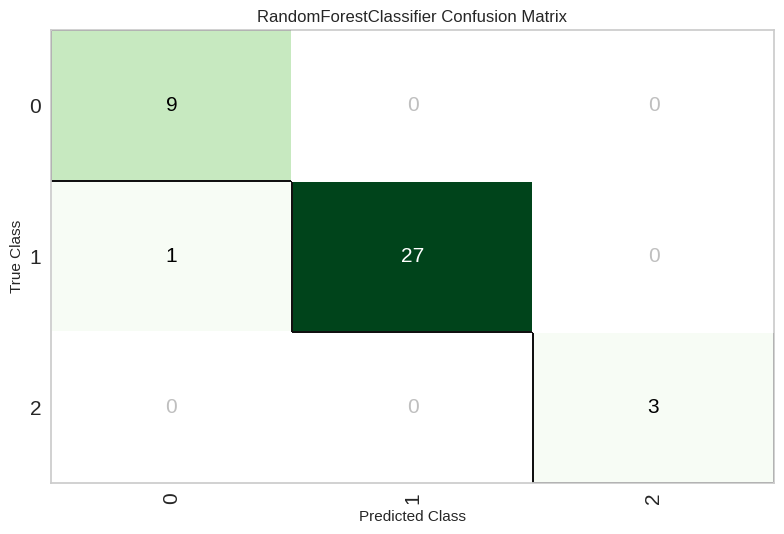

In [32]:
plot_model(rf, plot = 'confusion_matrix')


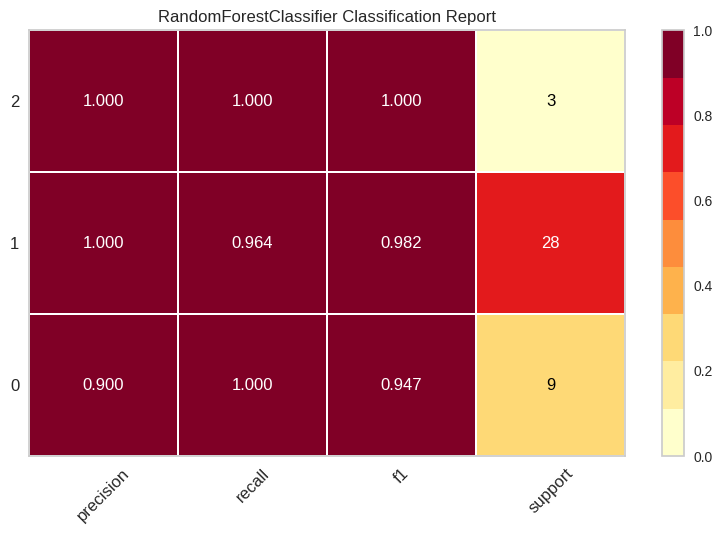

In [33]:
plot_model(rf, plot = 'class_report')

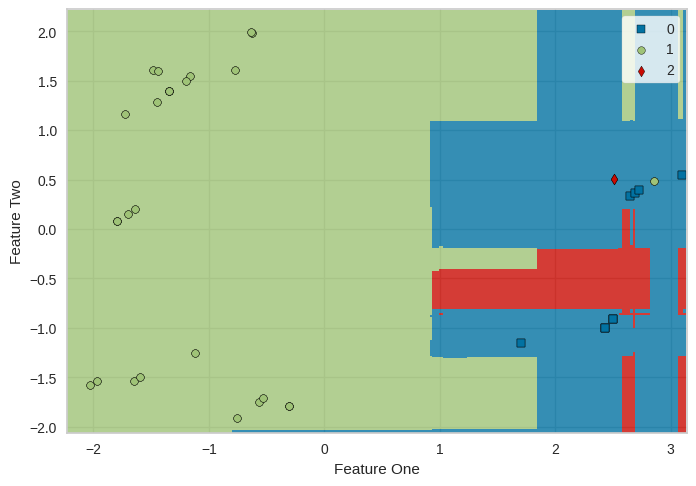

In [34]:
plot_model(rf, plot='boundary')

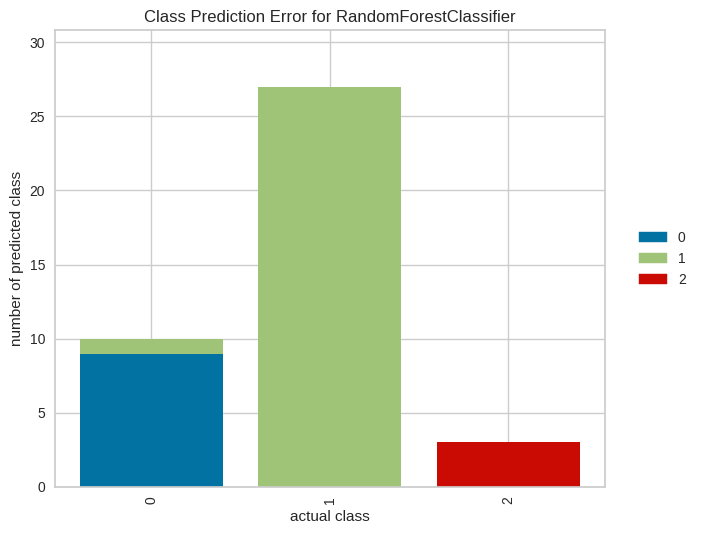

In [35]:
plot_model(rf, plot = 'error')

In [36]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Prediction on test

In [37]:
predict_model(rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9750,0.9810,0.9750,0.9775,0.9754,0.9463,0.9479


## Finalizing

In [38]:
final_rf = finalize_model(rf)

In [39]:
final_rf

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Age', 'Gender', 'Income',
                                             'Education', 'Marital Status',
                                             'Number of Children',
                                             'Home Ownership'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose='de...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=123,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [40]:
predict_model(final_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


## Predict on Unseen data

In [41]:
unseen_predictions = predict_model(final_rf, data=test_df)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9697,1.0000,0.9697,0.9710,0.9683,0.9329,0.9355


,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score,prediction_label,prediction_score
135,25,0,55000,1,1,0,1,0,0,1.00
115,48,0,87500,2,0,1,0,1,1,1.00
131,26,0,55000,1,0,1,0,0,1,0.51
55,39,0,62500,1,0,2,0,1,1,1.00
95,35,0,90000,2,0,1,0,1,1,1.00
